#EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [19]:
# Importing the Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 1. Loading the Dataset
# The dataset contains spam and ham (non-spam) text messages
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [21]:
# Display the first few rows of the dataset
print("Initial dataset preview:")
print(data.head())

Initial dataset preview:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [22]:
# Display the column names
print("\nColumn names in the dataset:")
print(data.columns)


Column names in the dataset:
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [23]:
# 2. Data Cleaning: Removing unnecessary columns
# Keeping only the 'v1' (label) and 'v2' (message) columns and renaming them for clarity
data = data[['v1', 'v2']]
data.columns = ['Label', 'Message']

In [24]:
# Display the cleaned dataset
print("\nDataset after cleaning:")
print(data.head())


Dataset after cleaning:
  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [25]:
# 3. Preprocessing: Converting Labels to Binary
# Spam messages will be labeled as '1' and ham (non-spam) messages as '0'
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})

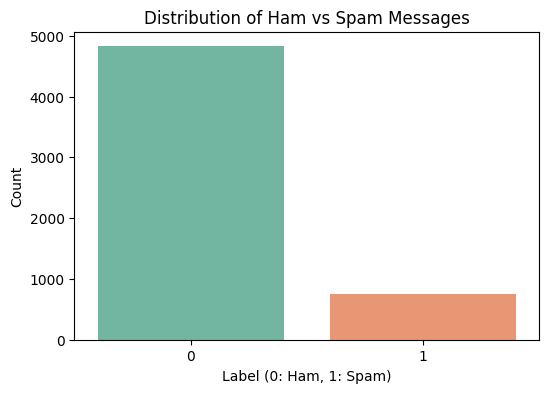

In [26]:
# Visualizing the distribution of 'ham' and 'spam' messages
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=data, palette='Set2', hue='Label', legend=False)
plt.title("Distribution of Ham vs Spam Messages")
plt.xlabel("Label (0: Ham, 1: Spam)")
plt.ylabel("Count")
plt.show()

In [27]:
# 4. Splitting the Data into Training and Testing Sets
# The dataset is split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Label'], test_size=0.3, random_state=42)

In [28]:
# Display the size of the training and testing sets
print(f"\nSize of training data: {X_train.shape[0]} messages")
print(f"Size of testing data: {X_test.shape[0]} messages")


Size of training data: 3900 messages
Size of testing data: 1672 messages


In [29]:
# 5. Feature Extraction using TF-IDF Vectorizer
# Convert the text messages into numerical form using Term Frequency-Inverse Document Frequency (TF-IDF)
# TF-IDF helps assign importance to words in each document by considering their overall frequency in the corpus
vectorizer = TfidfVectorizer(stop_words='english')  # 'stop_words' removes common words like 'the', 'is'
X_train_tfidf = vectorizer.fit_transform(X_train)   # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test)         # Transform the test data

In [30]:
# Display the shape of the transformed data
print(f"\nTF-IDF training data shape: {X_train_tfidf.shape}")
print(f"TF-IDF test data shape: {X_test_tfidf.shape}")


TF-IDF training data shape: (3900, 6946)
TF-IDF test data shape: (1672, 6946)


In [31]:
# 6. Model Training: Naive Bayes Classifier
# Using the Multinomial Naive Bayes classifier, which is well-suited for text classification tasks
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [32]:
# 7. Predictions: Using the trained model to predict labels on the test set
y_pred = model.predict(X_test_tfidf)

In [33]:
# 8. Model Evaluation
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9677


In [34]:
# Detailed classification report including precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



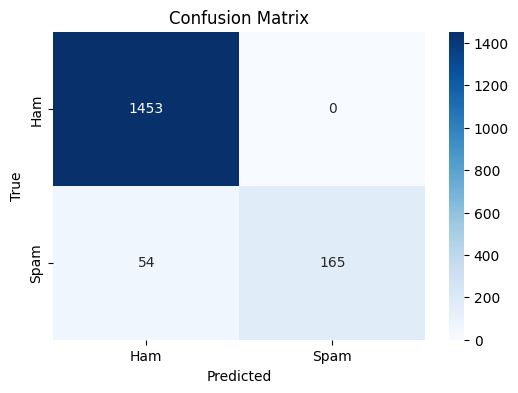

In [35]:
# 9. Visualization of Confusion Matrix
# The confusion matrix will show the true positives, true negatives, false positives, and false negatives
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()